# Investigate detection rate og success on AprilTags

In [36]:
from __init__ import *
import pandas as pd
import os
import ast
from matplotlib.collections import PatchCollection
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import json
from collections import Counter

class MulticolorPatch(object):
    def __init__(self, colors, alphas):
        self.colors = colors
        self.alphas = alphas
class MulticolorPatchHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        width, height = handlebox.width, handlebox.height
        patches = []
        for i, c in enumerate(orig_handle.colors):
            patches.append(plt.Rectangle([width/len(orig_handle.colors) * i - handlebox.xdescent, 
                                          -handlebox.ydescent],
                           width / len(orig_handle.colors),
                           height, 
                           facecolor=c, 
                           edgecolor='none', alpha=orig_handle.alphas[i]))

        patch = PatchCollection(patches,match_original=True)

        handlebox.add_artist(patch)
        return patch

In [37]:
# read file from csv
carryover = "carry_over_april_tag_testing"
path = f'../../data/{carryover}.json'
# load json file that has a dict in each row
df_co = pd.read_json(path, lines=True)
df_co = df_co.stack().apply(pd.Series).reset_index(level=1).rename(columns={"level_1": "frame"})

single = "no_carry_over_april_tag_testing"
path = f'../../data/{single}.json'
df_s = pd.read_json(path, lines=True)
df_s = df_s.stack().apply(pd.Series).reset_index(level=1).rename(columns={"level_1": "frame"})


In [38]:
# count the number of inferred tags for each row in each dataframe
df_co['n_inferred_tags'] = df_co['inferred_tags'].apply(lambda x: len(x))
df_s['n_inferred_tags'] = df_s['inferred_tags'].apply(lambda x: len(x))

df_co['n_missing_tags'] = df_co['not_found_tags'].apply(lambda x: len(x))
df_s['n_missing_tags'] = df_s['not_found_tags'].apply(lambda x: len(x))


In [39]:
# extract all values from the inferred_tags column
co_all_inferred_tags = df_co['inferred_tags'].values
s_all_inferred_tags = df_s['inferred_tags'].values
co_all_inferred_tags = [item for sublist in co_all_inferred_tags for item in sublist]
s_all_inferred_tags = [item for sublist in s_all_inferred_tags for item in sublist]

co_all_not_found_tags = df_co['not_found_tags'].values
s_all_not_found_tags = df_s['not_found_tags'].values
co_all_not_found_tags = [item for sublist in co_all_not_found_tags for item in sublist]
s_all_not_found_tags = [item for sublist in s_all_not_found_tags for item in sublist]

In [40]:
freq_df = pd.Series(co_all_inferred_tags).value_counts().reset_index()
freq_df.columns = ["Number", "Frequency"]
freq_df

,Number,Frequency
0,18,600
1,20,600
2,3,40
3,1,4
4,6,1
5,25,1


In [41]:
freq_df = pd.Series(s_all_inferred_tags).value_counts().reset_index()
freq_df.columns = ["Number", "Frequency"]
freq_df

,Number,Frequency
0,1,600
1,3,600
2,6,600
3,18,600
4,20,600
5,24,598
6,25,593
7,7,585
8,16,412
9,8,227


In [42]:
# number of non empty lists in the missing tags column
print(f"(df_co) Number of non empty lists in the not_found_tags column: {len(df_co[df_co['not_found_tags'].apply(lambda x: len(x) > 0)])}")
print(f"(df_s)  Number of non empty lists in the not_found_tags column: {len(df_s[df_s['not_found_tags'].apply(lambda x: len(x) > 0)])}")

(df_co) Number of non empty lists in the not_found_tags column: 1
(df_s)  Number of non empty lists in the not_found_tags column: 521


In [43]:
freq_df_co = pd.Series(co_all_not_found_tags).value_counts().reset_index()
freq_df_co.columns = ["Number", "Frequency"]
# make frequency column a percentage
# freq_df_co["Frequency"] = freq_df_co["Frequency"] / len(df_co)
freq_df_co

,Number,Frequency
0,24,1
1,25,1


In [44]:
freq_df_s = pd.Series(s_all_not_found_tags).value_counts().reset_index()
freq_df_s.columns = ["Number", "Frequency"]
# make frequency an accuracy percentage
# freq_df_s['Frequency'] = freq_df_s['Frequency'] / len(df_co) * 100
freq_df_s

,Number,Frequency
0,26,511
1,23,30
2,4,22
3,21,8
4,25,6
5,17,3
6,2,3
7,24,1
8,0,1


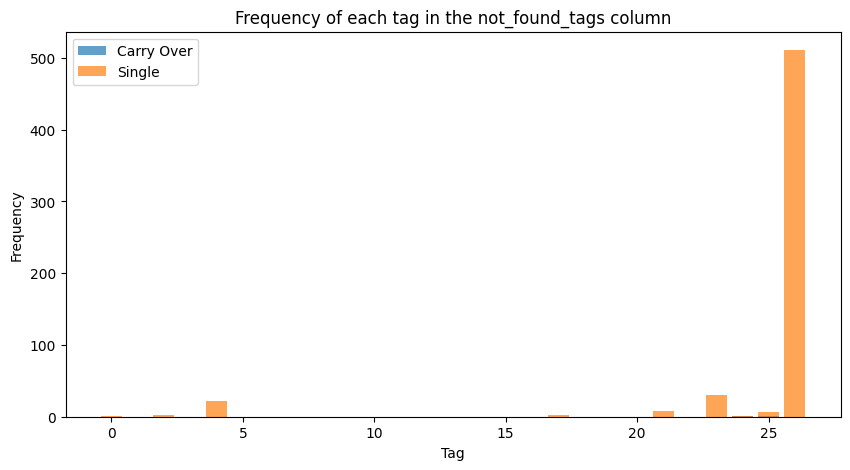

In [45]:
# plot barplot of the frequency of each tag
plt.figure(figsize=(10, 5))
plt.bar(freq_df_co["Number"], freq_df_co["Frequency"], alpha=0.7, label="Carry Over")
plt.bar(freq_df_s["Number"], freq_df_s["Frequency"], alpha=0.7, label="Single")
plt.xlabel("Tag")
plt.ylabel("Frequency")
plt.title("Frequency of each tag in the not_found_tags column")
plt.legend()


In [49]:
# Find row in df_co with the largest number of inferred tags and plot the image
max_tags = df_s['n_missing_tags'].max()
max_tags_row = df_s[df_s['n_missing_tags'] == max_tags]
max_tags_row.iloc[1]

frame                                                      frame_188
carry_over                                                     False
found_tags         [0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17,...
existing_tags      [0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...
inferred_tags                       [1, 3, 6, 7, 16, 18, 20, 24, 25]
not_found_tags                                        [2, 26, 4, 21]
n_inferred_tags                                                    9
n_missing_tags                                                     4
Name: 188, dtype: object

In [52]:
df_co

,frame,carry_over,found_tags,existing_tags,inferred_tags,not_found_tags,n_inferred_tags,n_missing_tags
0,frame_0,True,"[0, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 3, 6, 18, 20]","[24, 25]",5,2
1,frame_1,True,"[0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 3, 18, 20, 25]",[],5,0
2,frame_2,True,"[0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 3, 18, 20]",[],4,0
3,frame_3,True,"[0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 3, 18, 20]",[],4,0
4,frame_4,True,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 18, 20]",[],3,0
...,...,...,...,...,...,...,...,...
595,frame_595,True,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[18, 20]",[],2,0
596,frame_596,True,"[0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[18, 20]",[],2,0
597,frame_597,True,"[0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[18, 20]",[],2,0
598,frame_598,True,"[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[18, 20]",[],2,0
